In [5]:
%matplotlib widget

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
FILES = [
    "res_equeue.csv",
    "res_ff_queue.csv",
]

def load_results(path: str):
    df = pd.read_csv(path)

    df["RX_TIME"] = df["RX_End"] - df["RX_Start"]
    df["TX_TIME"] = df["TX_End"] - df["TX_Start"]
    df["LATENCY"] = df["RX_End"] - df["TX_End"]

    return df.groupby("Wait_Time")[["RX_TIME", "TX_TIME", "LATENCY"]].median().reset_index().sort_values("Wait_Time")

results = [(load_results(f), f) for f in FILES]


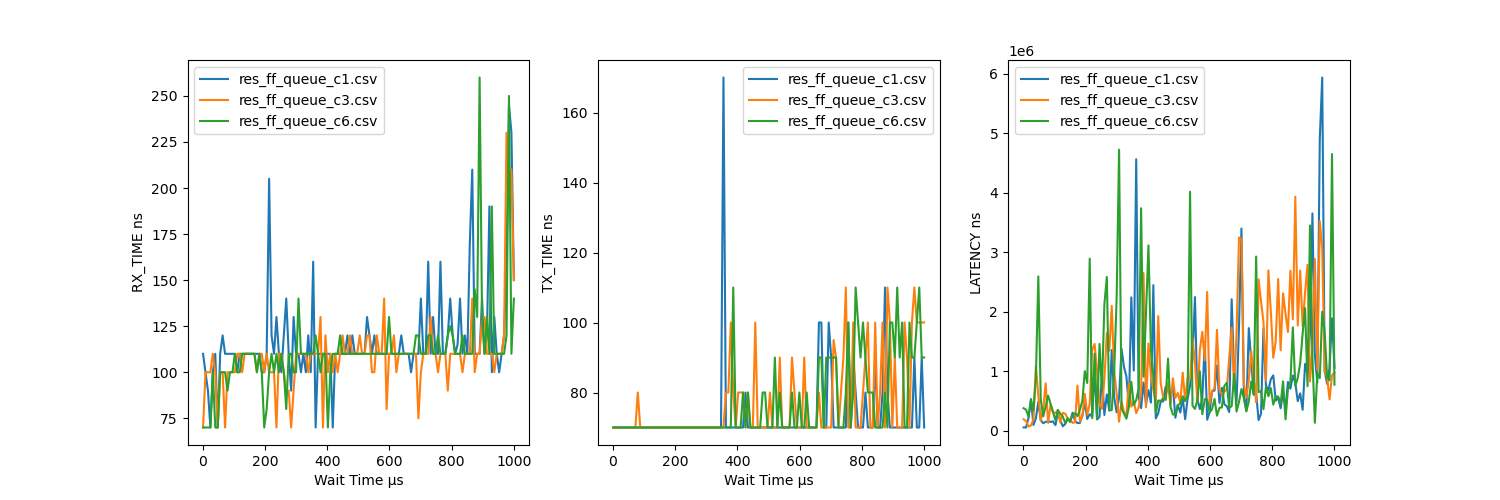

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

for i, col in enumerate(["RX_TIME", "TX_TIME", "LATENCY"]):
    for res, f in results:
        axs[i].plot(res["Wait_Time"] / 1000, res[col], label=f)
    axs[i].set_xlabel("Wait Time μs")
    axs[i].set_ylabel(f"{col} ns")
    axs[i].legend()

plt.show()